# Exercise 1

The **aims** of this exercise are:

*   Allow you practice slicing and analysing data with Pandas
*   Introduce you to the MovieLens dataset
*   Demonstrate use of Pandas to perform non-personalised and personalised recommendations

This exercise is worth 5% of the contribution to your final mark for RecSys, and is expected to take approximately 5-7 hours of your time. NB: This is an individual exercise.



In [2]:
#Standard setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

#Part A. MovieLens Exploration using Pandas

This exercise will use the [Movielens](https://grouplens.org/datasets/movielens/) data. There is a large dataset with 25M ratings, however we will focus on the smallest one, that has only 100k ratings.  

**Hint** : If you are using Colab, it might be good if you open these files, either on your own machine, or using Colab's inbuilt CSV viewer (via folder icon on the left hand sidebar). The CSV files are small enough to be searched using your favourite editor.

Let's look into the files using Pandas:

In [3]:
ratings_df = pd.read_csv("ml-latest-small/ratings.csv")
movies_df = pd.read_csv("ml-latest-small/movies.csv")

# we're going to treat userId as strings, and similarly as movies. This will prevent confusion later on.
ratings_df['userId'] = "u" + ratings_df['userId'].astype(str)
ratings_df['movieId'] = "m" + ratings_df['movieId'].astype(str)
movies_df['movieId'] = "m" +  movies_df['movieId'].astype(str)

In [4]:
ratings_df

,userId,movieId,rating,timestamp
0,u1,m1,4.0,964982703
1,u1,m3,4.0,964981247
2,u1,m6,4.0,964982224
3,u1,m47,5.0,964983815
4,u1,m50,5.0,964982931
...,...,...,...,...
100831,u610,m166534,4.0,1493848402
100832,u610,m168248,5.0,1493850091
100833,u610,m168250,5.0,1494273047
100834,u610,m168252,5.0,1493846352


`ratings_df` is a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Viewing it, we can see users (identified by userId) are rating various movies (cf. movieId).

We can slice and dice the dataframes, e.g.:

 * project a single column (this returns a [Pandas Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)).

In [6]:
movies_df["title"].head(5)

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object

 - project multiple columns (this returns a view of the original DataFrame, as another DataFrame object).

In [8]:
movies_df[["movieId", "title"]].head(5)

,movieId,title
0,m1,Toy Story (1995)
1,m2,Jumanji (1995)
2,m3,Grumpier Old Men (1995)
3,m4,Waiting to Exhale (1995)
4,m5,Father of the Bride Part II (1995)


 - Select rows based on one or more conditions

In [9]:
ratings_df[(ratings_df["userId"] == 'm500') & (ratings_df["rating"] == 1)]

,userId,movieId,rating,timestamp




Let's practice a bit more with Pandas. You can also refer to the [Pandas Dataframe API documentation.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

Write code to answer the following questions:

## Task 1. How many users are there in this dataset?


In [10]:
ratings_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [11]:
num_users = len(ratings_df['userId'].unique())
num_users

610

## Task 2. What is the average rating of *each user*?

The output should be a Pandas Series containing an average rating for each of the users.

Hint: Use a [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) on the ratings_df dataframe. [Aggregation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation) will also be useful.


In [12]:
average_each_user = ratings_df.groupby('userId')['rating'].mean()
average_each_user.head(3)

userId
u1      4.366379
u10     3.278571
u100    3.945946
Name: rating, dtype: float64

## Task 3. What is the average number of ratings per-user?

In contrast to Task 2, the solution is a single number.

Many solutions will involve [GroupBy.count()](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation).

In [13]:
average_ratings_per_user = ratings_df.groupby('userId')['rating'].count().mean()
average_ratings_per_user

165.30491803278687

## Analysing users's preferences.

Let's try something else. We can see what movies a given user has rated by "merging" the two dataframes - this equates to a JOIN in SQL. Let's do this for userId 556.


In [14]:
pd.merge(
    ratings_df[ratings_df["userId"]=='u556'],
    movies_df[movies_df["genres"] == "Fantasy"],
    on=["movieId"]).sort_values(by="rating", ascending=False)

,userId,movieId,rating,timestamp,title,genres
0,u556,m162600,4.0,1534321200,Miss Peregrine's Home for Peculiar Children (2...,Fantasy


It appears that this user is interested in adventure/fantasies movies.

NB: If the columns we are joining on dont have the same name, we can specify `left_on` and `right_on` attributes. See also the  [pd.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) documentation.

## Task 4. Analysing movie categories

Lets examine two particular users a bit more, u556 and u7.

 - How many movies with "Fantasy" genre have u556 and u7 rated positively ($\geq 4$)?

 - Consider all of u556's ratings. What percentage of all these ratings are positive ratings ($\geq 4$) and are for movies belonging to the "Fantasy" genre?

Hints:
 - Pandas Series has a useful `str.contains()` function:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
 - Pandas dataframes respond to `len()` as you would expect.

In [15]:
u_movies = pd.merge(ratings_df[np.logical_or(ratings_df["userId"] == "u556", ratings_df["userId"] == "u7")],
                       movies_df,
                       on=["movieId"])
combined_positive_fancy = len(u_movies[np.logical_and(u_movies["genres"] == "Fantasy", u_movies["rating"] >= 4)])
all_u556_ratings = u_movies[u_movies["userId"] == "u556"]
positive_ratings = all_u556_ratings[all_u556_ratings["rating"] >= 4]
percentage_positive = (len(positive_ratings)/len(all_u556_ratings)) * 100

fantasy_ratings = all_u556_ratings[all_u556_ratings["genres"] == "Fantasy"]
percentage_fantasy = (len(fantasy_ratings) / len(all_u556_ratings)) * 100

print(f"Films rated from u557 and u7 with ratings >= 4: {combined_positive_fancy}")
print(f"Percentage of ratings which are positive from u556: {percentage_positive:.2f}")
print(f"Percentage of ratings which are about Fantasy films from u556: {percentage_fantasy:.2f}")

Films rated from u557 and u7 with ratings >= 4: 1
Percentage of ratings which are positive from u556: 84.38
Percentage of ratings which are about Fantasy films from u556: 3.12


# Part B. Popularity-based Recomendation

Now let's examine the ratings of movies.

We can get a dataframe containing the number of times a movie has been rated by applying a groupby and aggregation of the ratings_df.


In [16]:
groupingCountSeries = ratings_df[["movieId", "rating"]].groupby(["movieId"]).count()
groupingCountSeries[groupingCountSeries.rating<25].head(5)

,rating
movieId,
m100,14
m100044,1
m100068,1
m100083,3
m100106,1


##Task 5. Plot the distribution of movie ratings.

Use Matplotlib's histogram function to plot the distribution of movie ratings from the `groupingCountSeries` dataframe. This will produce a bar chart with 'binned' counts.

Hints:
- apply a logarithmic scale for the y-axis, using matplotlib's `log=True` option.
- Allow matplotlib to use its default number of bins (which is 10).
- Matplotlib has a [`savefig()`](https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/#the-savefig-method) function for saving a PNG of a figure.

Marks will be lost for poor quality graphs, lacking in typical best practices. You will need to analyse this graph in the quiz.

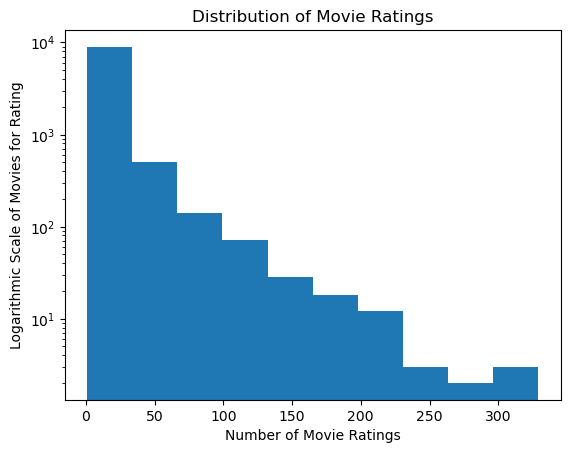

In [18]:
plt.hist(groupingCountSeries, log=True)
plt.title("Distribution of Movie Ratings")
plt.ylabel("Logarithmic Scale of Movies for Rating")
plt.xlabel("Number of Movie Ratings")
# plt.savefig("results/movie_distribution.png")
plt.show()


## Task 6. Find the names of *all* of the movies that have the highest *average* ratings

You should return a dataframe containing the ids and names of the movies, their average ratings, and the number of ratings. NB: You may need to analyse this dataframe further to answer the questions in the quiz.

Hints:
 - Try a [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). Once you have a Series with columns [movieId, meanRating], identify the highest value of meanRating. You can then merge this with the movies_df.
 - If the column we are trying to merge on is an index, we can use  `left_index=True` or `right_index=True` in the [pd.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html).


In [43]:
ratings_count_df = ratings_df.groupby("movieId").agg(count=("rating", "count"), mean_rating=("rating", "mean"))
highest_mean_rating = ratings_count_df["mean_rating"].max()

movies_with_highest = pd.merge(ratings_count_df[ratings_count_df["mean_rating"] == highest_mean_rating],
                               movies_df,
                               on="movieId").sort_values(by="count", ascending=False)
movies_with_highest["title"]

259                                Enter the Void (2009)
294                 Heidi Fleiss: Hollywood Madam (1995)
17                                   Lesson Faust (1994)
236                                  Belle époque (1992)
173    Jonah Who Will Be 25 in the Year 2000 (Jonas q...
                             ...                        
99                      The Bremen Town Musicians (1969)
98                                      All Yours (2016)
97                                 World of Glory (1991)
96                     SORI: Voice from the Heart (2016)
295                              English Vinglish (2012)
Name: title, Length: 296, dtype: object

You can now answer the questions in the quiz for Task 6, based on your  observations on analysing this table?

# Part C - Association Rules and Lift

I think we can do better than simply examining movie popularity.

Lets take all of the positive ratings (4 or 5) to find the most popular pairs of movies that users have watched. We'll consider these are "successful movie watches" of these users.

There is a lot going on there, so please take the time to break it down to understand what it does.

NB: In this code, we perform a "self-join" on a dataframe. If this is unfamiliar, you can read more at:
 - https://dfrieds.com/data-analysis/self-join-python-pandas.html
 - https://www.w3schools.com/sql/sql_join_self.asp



In [76]:
positives = ratings_df[ratings_df["rating"]>=4]

# join positives with itself on userId to get all distinct pairs of movies watched by a given user.
pairs = pd.merge(positives, positives, on=["userId"])
pairs = pairs[ pairs["movieId_x"] != pairs["movieId_y"] ]

# we only want A->B, not B->A. Use the timestamps to restrict the selected pairs such that
# one movie is rated after the other movie, OR if the timestampes are tied, we break such
# a tie by movieId. Bitwise operators & and | are used for combining Pandas series containing booleans
sequences = pairs[
                  (pairs["timestamp_x"] < pairs["timestamp_y"])
                  |
                  (
                      (pairs["timestamp_x"] == pairs["timestamp_y"])
                      &
                      (pairs["movieId_x"] < pairs["movieId_y"])
                  )
                  ]

# lets count the frequency of each pair of movies. As a user can only rate a movie once, you can
# also think of this as the number of users that have watched each pair of movies.
paircounts = sequences[["movieId_x", "movieId_y", "userId"]].groupby(["movieId_x", "movieId_y"]).count()

# sort by the most popular pairs.
pairswithcounts = paircounts.reset_index().rename(columns={"userId" : "count"}).sort_values(['count'], ascending=False)

# display the top most frequent pairs
pairswithcounts.head()

,movieId_x,movieId_y,count
1579647,m318,m356,112
1580428,m318,m527,98
1421549,m296,m593,95
1420937,m296,m47,92
1191679,m260,m1196,91


## Task 7. Display the titles of the (most popular) movie pairs from `pairswithcounts`

You will need to analyse this dataframe to complete the questions in the quiz.

Hint:
 - you will need to re-sort after a pd.merge()

In [82]:
def df_exclude_columns(df, columns):
    return df[df.columns.difference(columns, sort=False)]

In [80]:
first_merge = pd.merge(pairswithcounts, movies_df[["movieId", "title"]], left_on="movieId_x", right_on="movieId")
second_merge = pd.merge(pairswithcounts, movies_df[["movieId", "title"]], left_on="movieId_y", right_on="movieId")

In [99]:
pd.merge(df_exclude_columns(first_merge,["movieId"]), 
         df_exclude_columns(second_merge,["movieId"]),
         on=["movieId_x", "movieId_y"]) \
        .drop("count_y", axis=1) \
        .rename(columns={"title_x": "First film", "title_y": "Second film", "count_x": "count"}) \
        .sort_values(by="count", ascending=False)

,movieId_x,movieId_y,count,First film,Second film
0,m318,m356,112,"Shawshank Redemption, The (1994)",Forrest Gump (1994)
1,m318,m527,98,"Shawshank Redemption, The (1994)",Schindler's List (1993)
4151,m296,m593,95,Pulp Fiction (1994),"Silence of the Lambs, The (1991)"
4152,m296,m47,92,Pulp Fiction (1994),Seven (a.k.a. Se7en) (1995)
8863,m260,m1196,91,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back...
...,...,...,...,...,...
1549165,m1947,m1437,1,West Side Story (1961),"Cement Garden, The (1993)"
1549166,m1947,m2871,1,West Side Story (1961),Deliverance (1972)
1549167,m1947,m2874,1,West Side Story (1961),"Pajama Game, The (1957)"
1549168,m1947,m4369,1,West Side Story (1961),"Fast and the Furious, The (2001)"


    ## Task 8. Calculate Lift (see Lecture 3) for all pairs in `paircounts`.  

Now you should calculate Lift. You will need to carefully consider your event space.

Your target dataframe should have columns:
 - movieId_x	movieId_y
 - count - number of users that have positively rated both movies x and y.
 - ratingCount_x	ratingCount_y	- number of users that have positively rated these movies in total.
 - lift	- your calculated lift.
 - title_x, title_y, genre_x and genre_y - metadata about the films, so you know if you have success.

Hints:
 - You will need to join `pairswithcounts` with a dataframe containing rating counts of individual movies. A calculated column will be needed. See https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html or https://stackoverflow.com/a/12377083/9989050 for hints on how to achieve that.
 - If you come across duplicated columns in your solution, you can use this trick https://stackoverflow.com/a/40435354/9989050 to get rid of them.
 - You should [sort](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) your dataframe.

Below I provide the highest lift movies for you to check your solution.


In [ ]:
# add your solution here

If your solution is correct, you will see the highest lift movie pairs.
Let's check them - do the highest lift movies pairs make sense? e.g. "Pink Panther, The (2006)" (Adventure|Comedy|Crime) with	"For Richer or Poorer (1997)" (Comedy).

It should be clear that these lift pairs do not have high support.

## Task 9 - Support Thresholds


We can make more meaningful recommendations using Lift if we apply a Support threshold. For instance, we can remove movie pairs with support count $< 10$.

So in essence, we can use lift to identify highly co-occurring movie pairs without resorting to any collaborative notions.

Keep this dataframe around - you will need it to answer the questions for Task 9 in the quiz.

In [ ]:
# add your solution here

I got the "The Hunger Games (2012)" paired with "The Hunger Games: Mockingjay - Part 1 (2014)" as the movie pair with the highest lift. This seems a good pairing!

# End of Exercise

As part of your submission, you should complete the Exercise 1 quiz on Moodle.
You will need to upload your notebook, complete with the **results** of executing the code.